In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import seaborn as sns
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder



In [2]:
def random_forest(df):
    f_select=[]
   
    X = df.drop('winner',1)
    y = df['winner'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    clf = RandomForestClassifier(n_estimators=100)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    proba = clf.predict_proba(X_test)
    proba = np.around(proba, decimals=2)


    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

    # feature importanti per determinarlo
    feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
    print('Feature importance:\n', feature_imp)
    f_selection=feature_imp[(feature_imp>0)]
    print('Feature selection:\n',f_selection)
            
        
    # Creating a bar plot
    sns.barplot(x=f_selection, y=f_selection.index)
    # Add labels to your graph
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.legend()
    plt.show()
    #return X_test, y_test, y_pred, proba


In [ ]:
def linear_svm(df):
    X = df.drop('winner',1)
    y = df['winner'].values


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    svclassifier = SVC(kernel='linear', probability=True)
    svclassifier.fit(X_train, y_train)
    proba = svclassifier.predict_proba(X_test)
    proba = np.around(proba, decimals=2)
    y_pred = svclassifier.predict(X_test)

    print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
    print('Report:\n', classification_report(y_test, y_pred))
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
    print('Proba',proba)

    

In [3]:
def linear_svm1(df):
    X = df.drop('winner',1)
    y = df['winner'].values


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

    svclassifier =LinearSVC()
    svclassifier.fit(X_train, y_train)
    #proba = svclassifier.predict_proba(X_test)
    #proba = np.around(proba, decimals=2)
    y_pred = svclassifier.predict(X_test)

    print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
    print('Report:\n', classification_report(y_test, y_pred))
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
    #print('Proba',proba)

In [4]:
def boruta(df):
    X = df.drop('winner',1)
    y = df['winner'].values
    ###initialize Boruta
    forest = RandomForestRegressor(
       n_jobs = -1, 
       max_depth = 5
    )
    boruta = BorutaPy(
       estimator = forest, 
       n_estimators = 'auto',
       max_iter = 100 # number of trials to perform
    )
    ### fit Boruta (it accepts np.array, not pd.DataFrame)
    boruta.fit(np.array(X), np.array(y))
    ### print results
    green_area = X.columns[boruta.support_].to_list()
    blue_area = X.columns[boruta.support_weak_].to_list()
    print('features in the green area:', green_area)
    print('features in the blue area:', blue_area)

In [5]:
def naive_bayes(df):
    X = df.drop('winner',1)
    y = df['winner'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
    print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
    print('Report:\n', classification_report(y_test, y_pred))
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

In [6]:
df = pd.read_pickle('../docs/csv/data.scenarioTest2v2.pkl.gz')
#df=pd.read_csv('../docs/csv/csvscenarioJunction.csv')

In [ ]:
len(df.columns)

In [7]:
c=df.select_dtypes(include='object').columns.tolist()


# Label Encoder


In [8]:
le_df=df
le = preprocessing.LabelEncoder()
le_df[c] = df[c].apply(lambda col: le.fit_transform(col))

In [9]:
le_df

,team_red_Tank1,name_red_Tank1,index_red_Tank1,kind_red_Tank1,move_red_Tank1,load_red_Tank1,hp_red_Tank1,hp_max_red_Tank1,int_atk_red_Tank1,int-def_red_Tank1,...,weapon_AT_blue_Tank4,weapon_MT_blue_Tank4,weapon_GR_blue_Tank4,weapon_SM_blue_Tank4,weapon_SR_blue_Tank4,winner,meta_scenario,meta_p_red,meta_p_blue,meta_seed
0,0,0,0,2,7,1,1,1,6,0,...,0,0,0,2,0,1,0,0,1,555999039
1,0,0,0,2,7,1,1,1,6,0,...,0,0,0,2,0,1,0,0,1,555999039
2,0,0,0,2,7,1,1,1,6,0,...,0,0,0,2,0,1,0,0,1,555999039
3,0,0,0,2,7,1,1,1,6,0,...,0,0,0,2,0,1,0,0,1,555999039
4,0,0,0,2,7,1,1,1,6,0,...,0,0,0,2,0,1,0,0,1,555999039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,0,0,0,2,7,1,0,1,5,1,...,0,0,0,2,0,0,0,2,0,381606562
26,0,0,0,2,7,1,0,1,5,1,...,0,0,0,2,0,0,0,2,0,381606562
27,0,0,0,2,7,1,0,1,5,1,...,0,0,0,2,0,0,0,2,0,381606562
28,0,0,0,2,7,1,0,1,5,1,...,0,0,0,2,0,0,0,2,0,381606562


# One Hot Encoder

In [ ]:
ohe_df=df
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(ohe_df[c]).toarray())
# merge with main df bridge_df on key values
ohe_df = ohe_df.join(enc_df)
ohe_df

# Dummies

In [ ]:
bridge_df=df
X = pd.get_dummies(bridge_df, prefix_sep='_', drop_first=True)
bridge_df = bridge_df.merge(X)
bridge_df

In [ ]:
X

In [ ]:
plt.scatter(df.index,df['kind_red_Tank1'])

[[35254  2697]
 [ 3344 23304]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     37951
           1       0.90      0.87      0.89     26648

   micro avg       0.91      0.91      0.91     64599
   macro avg       0.90      0.90      0.90     64599
weighted avg       0.91      0.91      0.91     64599

Accuracy: 0.9064846205049614
Feature importance:
 meta_seed                      0.277280
meta_p_red                     0.052113
positionY_red_Tank1            0.036486
positionY_red_Tank2            0.036286
meta_p_blue                    0.032468
                                 ...   
transported-by_blue_Tank3      0.000000
defense_basic_blue_Tank3       0.000000
defense_smoke_blue_Tank3       0.000000
defense_antitank_blue_Tank3    0.000000
team_red_Tank1                 0.000000
Length: 164, dtype: float64
Feature selection:
 meta_seed               0.277280
meta_p_red              0.052113
positionY_red_Tank1     0.036486
posit

No handles with labels found to put in legend.


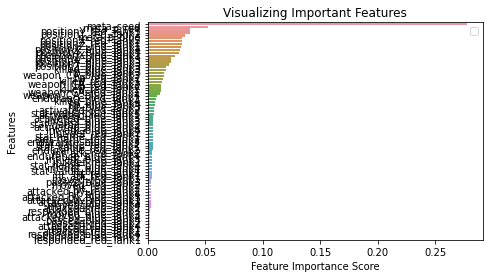

In [10]:
random_forest(le_df)

In [ ]:
boruta(df)

linear_svm(df)

In [11]:
linear_svm1(le_df)

C:\Users\Nicol\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Confusion matrix:
 [[    0 38062]
 [    0 26537]]
Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     38062
           1       0.41      1.00      0.58     26537

   micro avg       0.41      0.41      0.41     64599
   macro avg       0.21      0.50      0.29     64599
weighted avg       0.17      0.41      0.24     64599

Accuracy: 0.410795832752829


C:\Users\Nicol\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nicol\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nicol\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
naive_bayes(le_df)

Number of mislabeled points out of a total 107665 points : 44191
Confusion matrix:
 [[63474     0]
 [44191     0]]
Report:
               precision    recall  f1-score   support

           0       0.59      1.00      0.74     63474
           1       0.00      0.00      0.00     44191

   micro avg       0.59      0.59      0.59    107665
   macro avg       0.29      0.50      0.37    107665
weighted avg       0.35      0.59      0.44    107665

Accuracy: 0.5895509218408954


C:\Users\Nicol\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nicol\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nicol\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
linear_svm(df)